# **第3章　学校のクラス編成**

### **3.2 課題整理**

### クラス編成問題

- 公立中学校のクラス編成
> **要件(1):学年の全生徒をそれぞれ一つのクラスに割り当てる**

- 学校には318人の生徒がいて、8つのクラスがある
> **要件(2):各クラスの生徒の人数は39人以上、40人以下とする**

- 学年に男子生徒が158人、女子生徒が160人いる
> **要件(3):各クラスの男子生徒、女子生徒の人数は20人以下とする**

- 学力試験は500点満点で、平均点は303.6点
> **要件(4):各クラスの学力の平均点は学年平均点±10点とする**

- 学年にリーダー気質の生徒が17人いる
> **要件(5):各クラスにリーダー気質の生徒を2人以上割り当てる**

- 学年に特別に支援が必要な生徒が4人いる
> **要件(6):特別な支援が必要な生徒は各クラスに1人以下とする**

- 学年に特定ペア(双子や同姓同名)が3組いる
> **要件(7):特定ペアの生徒は同一クラスに割り当てる**


### **3.3 数理モデリングと実装**

### ②データの確認

In [47]:
# データ処理のためのライブラリpandasの取り込み
import pandas as pd

(1)生徒データ(students.csv)の確認

In [48]:
# students.csvからの生徒データの取得
student_df = pd.read_csv('students.csv')
print(len(student_df))
student_df.head()

318


,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317


In [49]:
# 学籍番号の確認
student_df['student_id']

0        1
1        2
2        3
3        4
4        5
      ... 
313    314
314    315
315    316
316    317
317    318
Name: student_id, Length: 318, dtype: int64

In [50]:
# 最大値の確認
student_df['student_id'].max()

318

In [51]:
# 最小値の確認
student_df['student_id'].min()

1

In [52]:
# 1〜318まで隙間なく番号が振られているかの確認
set(range(1, 319)) == set(student_df['student_id'].tolist())

True

In [53]:
# 性別（gender）の確認
student_df['gender'].value_counts()

gender
0    160
1    158
Name: count, dtype: int64

In [54]:
# 学力試験の点数(score)の統計量の確認
student_df['score'].describe()

count    318.000000
mean     303.644654
std       65.179995
min       88.000000
25%      261.000000
50%      310.000000
75%      350.000000
max      485.000000
Name: score, dtype: float64

<Axes: >

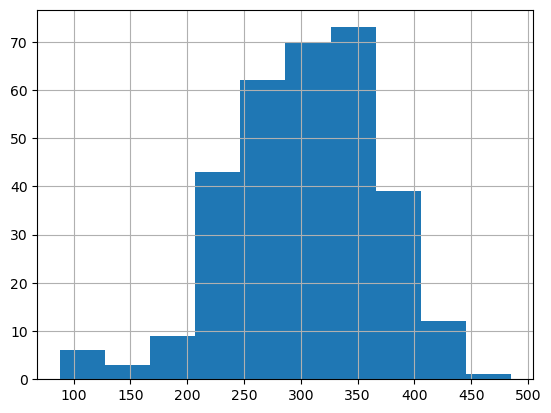

In [55]:
# 学力試験の点数(score)の分布の確認
student_df['score'].hist()

In [56]:
# リーダー気質フラグ(leader_flag)の確認
student_df['leader_flag'].value_counts()

leader_flag
0    301
1     17
Name: count, dtype: int64

In [57]:
# 特別支援フラグ(support_flag)の確認
student_df['support_flag'].value_counts()

support_flag
0    314
1      4
Name: count, dtype: int64

(2)特定ペアデータ(student_pairs.csv)の確認

In [58]:
# student_pairs.csvからの特定ペアデータの取得
student_pairs_df = pd.read_csv('student_pairs.csv')
print(len(student_pairs_df))
student_pairs_df

3


,student_id1,student_id2
0,118,189
1,72,50
2,314,233


### ③数理モデリングと実装

In [59]:
# PythonライブラリPuLPの取り込み
import pulp

In [60]:
# 数理モデルのインスタンス作成
prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

- リスト
  - 生徒のリスト：$S$
  - クラスのリスト：$C$
- 変数
  - 生徒sをクラスcに割り当てる場合に1、そうでない場合に0をとる変数：$x_{s,c} \in (0,1)  (s \in S, c \in C)$

In [61]:
# 生徒のリスト
S = student_df['student_id'].tolist()
print(S)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [62]:
# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
C

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [63]:
# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]
print(SC[:30])

[(1, 'A'), (1, 'B'), (1, 'C'), (1, 'D'), (1, 'E'), (1, 'F'), (1, 'G'), (1, 'H'), (2, 'A'), (2, 'B'), (2, 'C'), (2, 'D'), (2, 'E'), (2, 'F'), (2, 'G'), (2, 'H'), (3, 'A'), (3, 'B'), (3, 'C'), (3, 'D'), (3, 'E'), (3, 'F'), (3, 'G'), (3, 'H'), (4, 'A'), (4, 'B'), (4, 'C'), (4, 'D'), (4, 'E'), (4, 'F')]


In [64]:
# 生徒をどのクラスに割り当てるかを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

- 要件(1)学年の全生徒をそれぞれ一つのクラスに割り当てる
  - $\sum_{c \in C} x_{s,c} = 1  (s \in S)$

In [65]:
# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

- 要件(2)各クラスの生徒の人数は39人以上、40人以下とする
  - $\sum_{s \in S} x_{s,c} \geq 39  (s \in S)$
  - $\sum_{s \in S} x_{s,c} \leq 40  (s \in S)$

In [66]:
# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

- 要件(3)各クラスの男子生徒、女子生徒の人数は20人以下とする
  - $\sum_{s \in S_{male}} x_{s,c} \leq 20  (s \in S)$
  - $\sum_{s \in S_{female}} x_{s,c} \leq 20  (s \in S)$

In [67]:
# 男子生徒のリスト
S_male = [row.student_id for row in student_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in student_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

- 定数
  - 各生徒学力：$score_s (s \in S)$
  - 学年平均点：$score\_mean$
- 要件(4)各クラスの学力試験の平均点は学年平均点±10点とする
  - $score\_mean - 10 \leq　\frac {\sum_{s \in S} score_s * x_{s,c}}{\sum_{s \in S} x_{s,c}} (c \in C)$
  - $\frac {\sum_{s \in S} score_s * x_{s,c}}{\sum_{s \in S} x_{s,c}} \leq　score\_mean + 10(c \in C)$

- 要件(4)を線形に置き換える
  - $(score\_mean - 10)*\sum_{s \in S} x_{s,c} \leq　\sum_{s \in S} score_s * x_{s,c} (c \in C)$
  - $\sum_{s \in S} score_s * x_{s,c} \leq　(score\_mean + 10)*\sum_{s \in S} x_{s,c}(c \in C)$

In [68]:
# 学力を辞書表現に変換
score = {row.student_id:row.score for row in student_df.itertuples()}
print(score)

# 平均点の算出
score_mean = student_df['score'].mean()
print(score_mean)
    
# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。    
for c in C:
    prob += (score_mean - 10) * pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([x[s,c] * score[s] for s in S]) 
    prob += pulp.lpSum([x[s,c] * score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

{1: 335, 2: 379, 3: 350, 4: 301, 5: 317, 6: 390, 7: 322, 8: 317, 9: 390, 10: 357, 11: 252, 12: 285, 13: 218, 14: 260, 15: 347, 16: 358, 17: 291, 18: 335, 19: 437, 20: 200, 21: 361, 22: 312, 23: 342, 24: 303, 25: 275, 26: 292, 27: 268, 28: 261, 29: 339, 30: 296, 31: 261, 32: 309, 33: 295, 34: 292, 35: 397, 36: 326, 37: 283, 38: 291, 39: 408, 40: 317, 41: 241, 42: 380, 43: 340, 44: 341, 45: 276, 46: 336, 47: 291, 48: 245, 49: 352, 50: 267, 51: 189, 52: 337, 53: 379, 54: 264, 55: 332, 56: 275, 57: 290, 58: 279, 59: 327, 60: 315, 61: 258, 62: 334, 63: 122, 64: 222, 65: 421, 66: 314, 67: 349, 68: 385, 69: 256, 70: 206, 71: 88, 72: 326, 73: 352, 74: 439, 75: 273, 76: 231, 77: 284, 78: 278, 79: 367, 80: 233, 81: 283, 82: 247, 83: 413, 84: 212, 85: 366, 86: 344, 87: 215, 88: 123, 89: 350, 90: 220, 91: 351, 92: 383, 93: 352, 94: 316, 95: 337, 96: 300, 97: 350, 98: 352, 99: 409, 100: 336, 101: 224, 102: 369, 103: 233, 104: 209, 105: 322, 106: 355, 107: 346, 108: 390, 109: 102, 110: 239, 111: 335

- リスト
  - リーダー気質の生徒のリスト：$S_{leader}$
- 要件(5)各クラスにリーダー気質の生徒を2人以上割り当てる
  - $\sum_{s \in S_{leader}} x_{s,c} \geq 2(c \in C)$

In [69]:
# リーダー気質の生徒の集合
S_leader = [row.student_id for row in student_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

- リスト
  - 特別な支援が必要な生徒のリスト：$S_{support}$
- 要件(6)特別な支援が必要な生徒は各クラスに1人以下とする
  - $\sum_{s \in S_{support}} x_{s,c} \leq 1(c \in C)$

In [70]:
# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in student_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

- リスト
  - 生徒の特定ペアリスト：$SS$
- 要件(7) 特定ペアの生徒は同一クラスに割り当てない
  - $x_{s1,c}+x_{s2,c} \leq 1 (c \in C, (s1, s2) \in SS)$

In [71]:
# 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in student_pairs_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for s1, s2 in SS:
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

## 数理モデル

- リスト
  - 生徒のリスト：$S$
  - クラスのリスト：$C$
  - 男子生徒のリスト：$S_{male}$
  - 女子生徒のリスト：$S_{female}$
  - リーダー気質の生徒のリスト：$S_{leader}$
  - 特別な支援が必要な生徒のリスト：$S_{support}$
  - 生徒の特定ペアリスト：$SS$
- 変数
  - 生徒sをクラスcに割り当てる場合に1、そうでない場合に0をとる変数：$x_{s,c} \in (0,1)  (s \in S, c \in C)$
- 定数
  - 生徒sの学力試験のテスト：$score_s (s \in S)$
  - 学力試験の学年平均点：$score\_mean$
- 制約式
  - 要件(1):学年の全生徒をそれぞれ一つのクラスに割り当てる
    - $\sum_{c \in C} x_{s,c} = 1  (s \in S)$
  - 要件(2):各クラスの生徒の人数は39人以上、40人以下とする
    - $\sum_{s \in S} x_{s,c} \geq 39  (s \in S)$
    - $\sum_{s \in S} x_{s,c} \leq 40  (s \in S)$
  - 要件(3):各クラスの男子生徒、女子生徒の人数は20人以下とする
    - $\sum_{s \in S_{male}} x_{s,c} \leq 20  (s \in S)$
    - $\sum_{s \in S_{female}} x_{s,c} \leq 20  (s \in S)$
  - 要件(4):各クラスの学力試験の平均点は学年平均点±10点とする
    - $score\_mean - 10 \leq　\frac {\sum_{s \in S} score_s * x_{s,c}}{\sum_{s \in S} x_{s,c}} (c \in C)$
    - $\frac {\sum_{s \in S} score_s * x_{s,c}}{\sum_{s \in S} x_{s,c}} \leq　score\_mean + 10(c \in C)$
  - 要件(5):各クラスにリーダー気質の生徒を2人以上割り当てる
    - $\sum_{s \in S_{leader}} x_{s,c} \geq 2(c \in C)$
  - 要件(6):特別な支援が必要な生徒は各クラスに1人以下とする
    - $\sum_{s \in S_{support}} x_{s,c} \leq 1(c \in C)$
  - 要件(7):特定ペアの生徒は同一クラスに割り当てない
    - $x_{s1,c}+x_{s2,c} \leq 1 (c \in C, (s1, s2) \in SS)$
- 目的関数(最大化)
  - なし

In [72]:
#prob # 追記

In [73]:
# 求解
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/y_suzuki/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_c/n95nswwd7dq6t2vx_rfc73fm0000gn/T/beb491b0515e4be99ccd9676e749077d-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_c/n95nswwd7dq6t2vx_rfc73fm0000gn/T/beb491b0515e4be99ccd9676e749077d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 411 COLUMNS
At line 20981 RHS
At line 21388 BOUNDS
At line 23934 ENDATA
Problem MODEL has 406 rows, 2545 columns and 15480 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.16 seconds
Cgl0005I 318 SOS with 2544 members
Cgl0004I processed model has 398 rows, 2544 columns (2544 integer (2544 of which binary)) and 12936 elements
Cbc0038I Initial state - 38 integers unsatisfied sum - 7.12529
Cbc0038I Pass   1: suminf.    0.21051 

In [74]:
# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]
            
for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Class: A
Num: 39
Student: [2, 9, 19, 39, 42, 63, 65, 71, 79, 83, 85, 88, 99, 109, 111, 123, 126, 136, 138, 145, 148, 165, 168, 173, 177, 179, 180, 193, 199, 206, 224, 233, 240, 246, 264, 267, 291, 292, 298]

Class: B
Num: 40
Student: [11, 15, 43, 48, 50, 70, 82, 89, 91, 102, 104, 113, 114, 120, 121, 124, 127, 146, 149, 159, 167, 170, 172, 176, 190, 203, 213, 220, 222, 231, 238, 245, 263, 270, 275, 276, 283, 287, 290, 317]

Class: C
Num: 40
Student: [3, 14, 23, 27, 31, 33, 41, 49, 53, 54, 58, 73, 93, 97, 98, 107, 122, 152, 156, 160, 171, 187, 201, 210, 211, 217, 219, 227, 236, 242, 254, 258, 260, 268, 273, 274, 277, 278, 301, 318]

Class: D
Num: 40
Student: [10, 13, 16, 36, 37, 51, 56, 59, 61, 67, 68, 75, 84, 92, 108, 128, 134, 139, 140, 158, 161, 175, 183, 188, 192, 198, 200, 205, 221, 225, 235, 241, 252, 255, 256, 257, 261, 266, 293, 316]

Class: E
Num: 39
Student: [4, 5, 21, 22, 24, 38, 69, 72, 78, 87, 96, 105, 106, 115, 129, 132, 141, 143, 150, 154, 164, 166, 184, 189, 195, 196, 197

In [75]:
import pandas as pd
import pulp

s_df = pd.read_csv('students.csv')
s_pair_df = pd.read_csv('student_pairs.csv')

prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

# 生徒のリスト
S = s_df['student_id'].tolist()

# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

# 学力を辞書表現に変換
score = {row.student_id:row.score for row in s_df.itertuples()}

# 平均点の算出
score_mean = s_df.score.mean()

# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。
for c in C:
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) >= (score_mean - 10) * pulp.lpSum([x[s,c] for s in S])
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

# リーダー気質の生徒の集合
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

    # 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for row in s_pair_df.itertuples():
    s1 = row.student_id1
    s2 = row.student_id2
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

# 求解
status = prob.solve()
print('Status:', pulp.LpStatus[status])

# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]

for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/y_suzuki/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_c/n95nswwd7dq6t2vx_rfc73fm0000gn/T/d6ceeef4638e4beaa4a8c646536cd35b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_c/n95nswwd7dq6t2vx_rfc73fm0000gn/T/d6ceeef4638e4beaa4a8c646536cd35b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 411 COLUMNS
At line 20981 RHS
At line 21388 BOUNDS
At line 23934 ENDATA
Problem MODEL has 406 rows, 2545 columns and 15480 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.13 seconds
Cgl0005I 318 SOS with 2544 members
Cgl0004I processed model has 398 rows, 2544 columns (2544 integer (2544 of which binary)) and 12936 elements
Cbc0038I Initial state - 38 integers unsatisfied sum - 8.90073
Cbc0038I Pass   1: suminf.    0.30070 

### 3.4 **数理モデルの検証**

### ①解が要件を満たしているかどうか確認する

要件(1) 学年の全生徒をそれぞれ①つのクラスに割り当てる

In [76]:
for s in S:
    # 割り当てられたクラスを取得
    assigned_class = [c for c in C if x[s,c].value()==1]
    #print(assigned_class)

    # 1つのクラスに割り当てられているか確認
    if len(assigned_class) != 1:
        print('error:', s, assigned_class)

検証用データフレームの作成

In [77]:
# 検証用のデータフレームの用意
result_df = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {s:c for s in S for c in C if x[s,c].value()==1}

# 生徒データに各生徒がどのクラスに割り当てられたかの情報を結合            
result_df['assigned_class'] = result_df['student_id'].map(S2C)
result_df.head(5)

,student_id,gender,leader_flag,support_flag,score,assigned_class
0,1,0,0,0,335,F
1,2,1,0,0,379,A
2,3,0,0,0,350,C
3,4,0,0,0,301,B
4,5,1,0,0,317,E


要件(2) 各クラスの生徒の人数は39人以上、40人以下とする

In [78]:
result_df.groupby('assigned_class')['student_id'].count()

assigned_class
A    39
B    40
C    40
D    40
E    40
F    40
G    40
H    39
Name: student_id, dtype: int64

(3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。

In [79]:
result_df.groupby(['assigned_class', 'gender'])['student_id'].count()

assigned_class  gender
A               0         20
                1         19
B               0         20
                1         20
C               0         20
                1         20
D               0         20
                1         20
E               0         20
                1         20
F               0         20
                1         20
G               0         20
                1         20
H               0         20
                1         19
Name: student_id, dtype: int64

(4) 各クラスの学力試験の平均点は学年平均点±10点とする。

In [80]:
result_df.groupby('assigned_class')['score'].mean()

assigned_class
A    309.000000
B    303.300000
C    312.125000
D    308.600000
E    294.750000
F    294.675000
G    312.200000
H    294.410256
Name: score, dtype: float64

(5) 各クラスにリーダー気質の生徒を2人以上割り当てる。

In [81]:
result_df.groupby(['assigned_class'])['leader_flag'].sum()

assigned_class
A    3
B    2
C    2
D    2
E    2
F    2
G    2
H    2
Name: leader_flag, dtype: int64

(6) 特別な支援が必要な生徒は各クラスに1人以下とする。

In [82]:
result_df.groupby(['assigned_class'])['support_flag'].sum()

assigned_class
A    0
B    1
C    1
D    0
E    1
F    0
G    1
H    0
Name: support_flag, dtype: int64

(7) 特定ペアの生徒は同一クラスに割り当てない。

In [83]:
for i, (s1, s2) in enumerate(SS):
    print('case:',i)
    c1 = S2C[s1]
    c2 = S2C[s2]
    print('s1:{}-{}'.format(s1, c1))
    print('s2:{}-{}'.format(s2, c2))
    print('')

case: 0
s1:118-G
s2:189-E

case: 1
s1:72-E
s2:50-B

case: 2
s1:314-H
s2:233-A



### ②設定した制約の見直しと課題の洗い出し

- 定数
  - 初期フラグ編成フラグ：$init\_flag_{s,c} (s \in S, c \in C)$
- 目的関数(最大化)
  - 初期クラス編成とできるだけ一致させる
    - $\sum_{s \in S, c \in C} x_{s,c}*init\_flag_{s,c} $

In [84]:
# データの可視化ライブラリmatplotlibの取り込み
import matplotlib.pyplot as plt

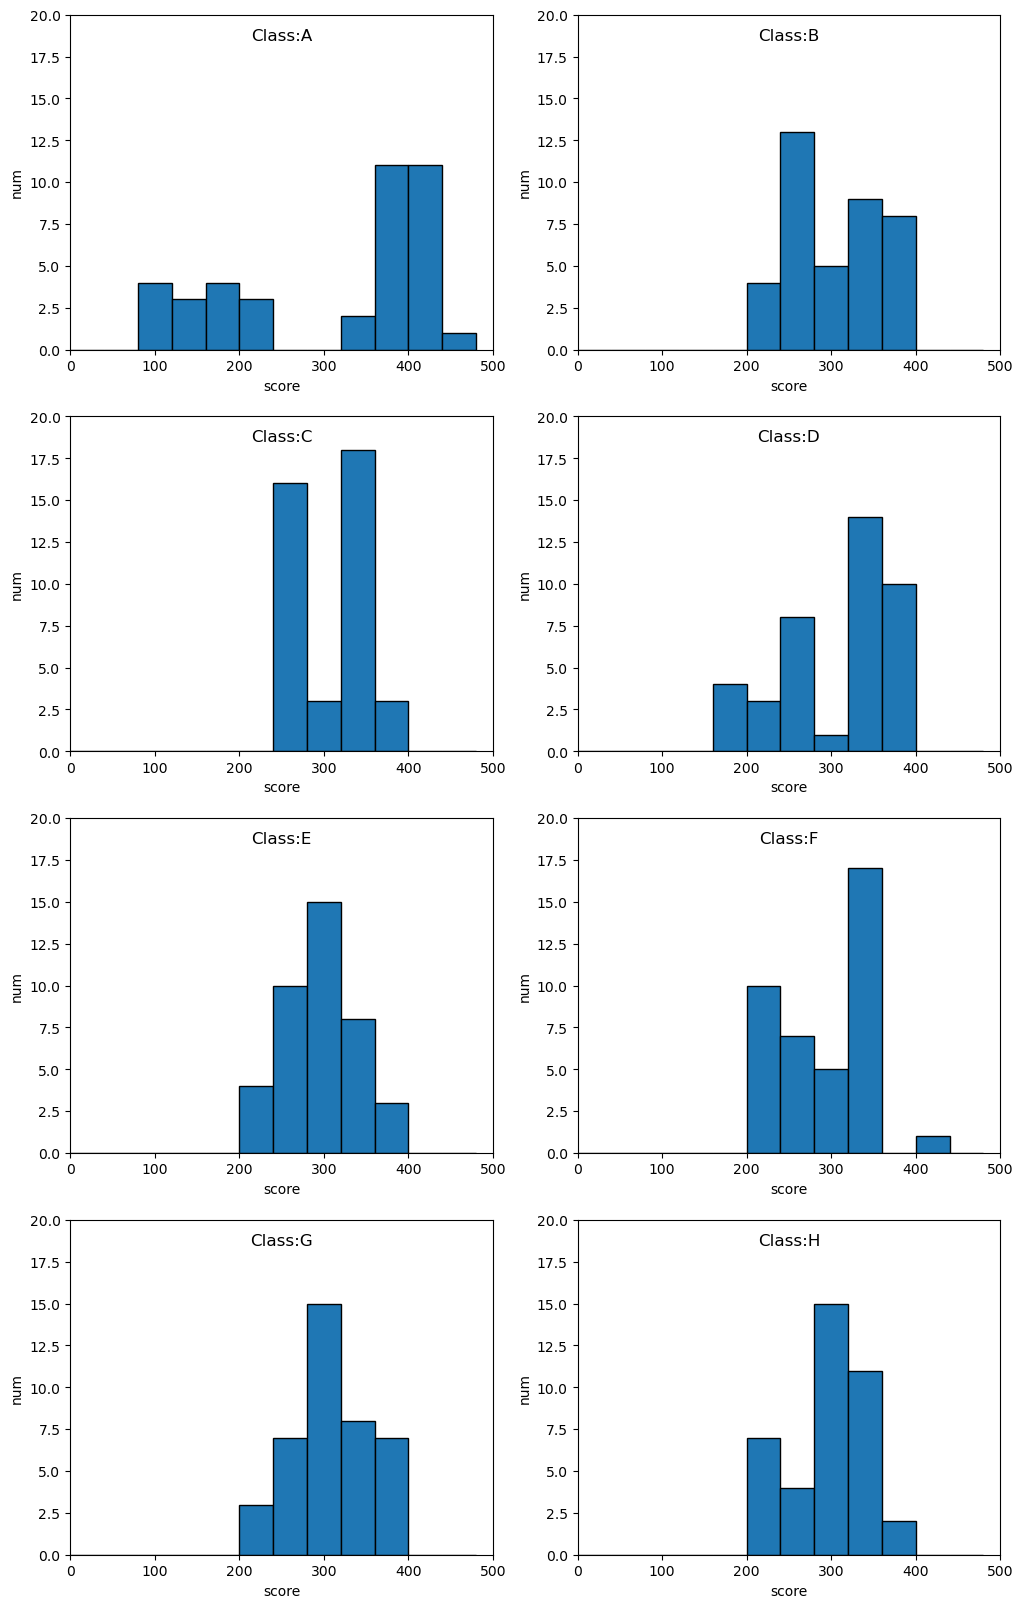

In [85]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = result_df[result_df['assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                        )
    ax.hist(cls_df['score'], bins=range(0,500,40), edgecolor='black')
    ax.set_title('Class:{:s}'.format(c), loc='center', y=0.9)

### ③制約の改善と数理最適化モデルの修正

In [86]:
# 初期クラス編成のデータを作成
# 学力をもとに順位を付与
s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first') 

# 学力順にクラス編成し、init_assigned_classカラムを作成
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)
s_df.head()

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D


In [87]:
# init_flagを作成
init_flag = {(s,c):0 for s in S for c in C}

for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1

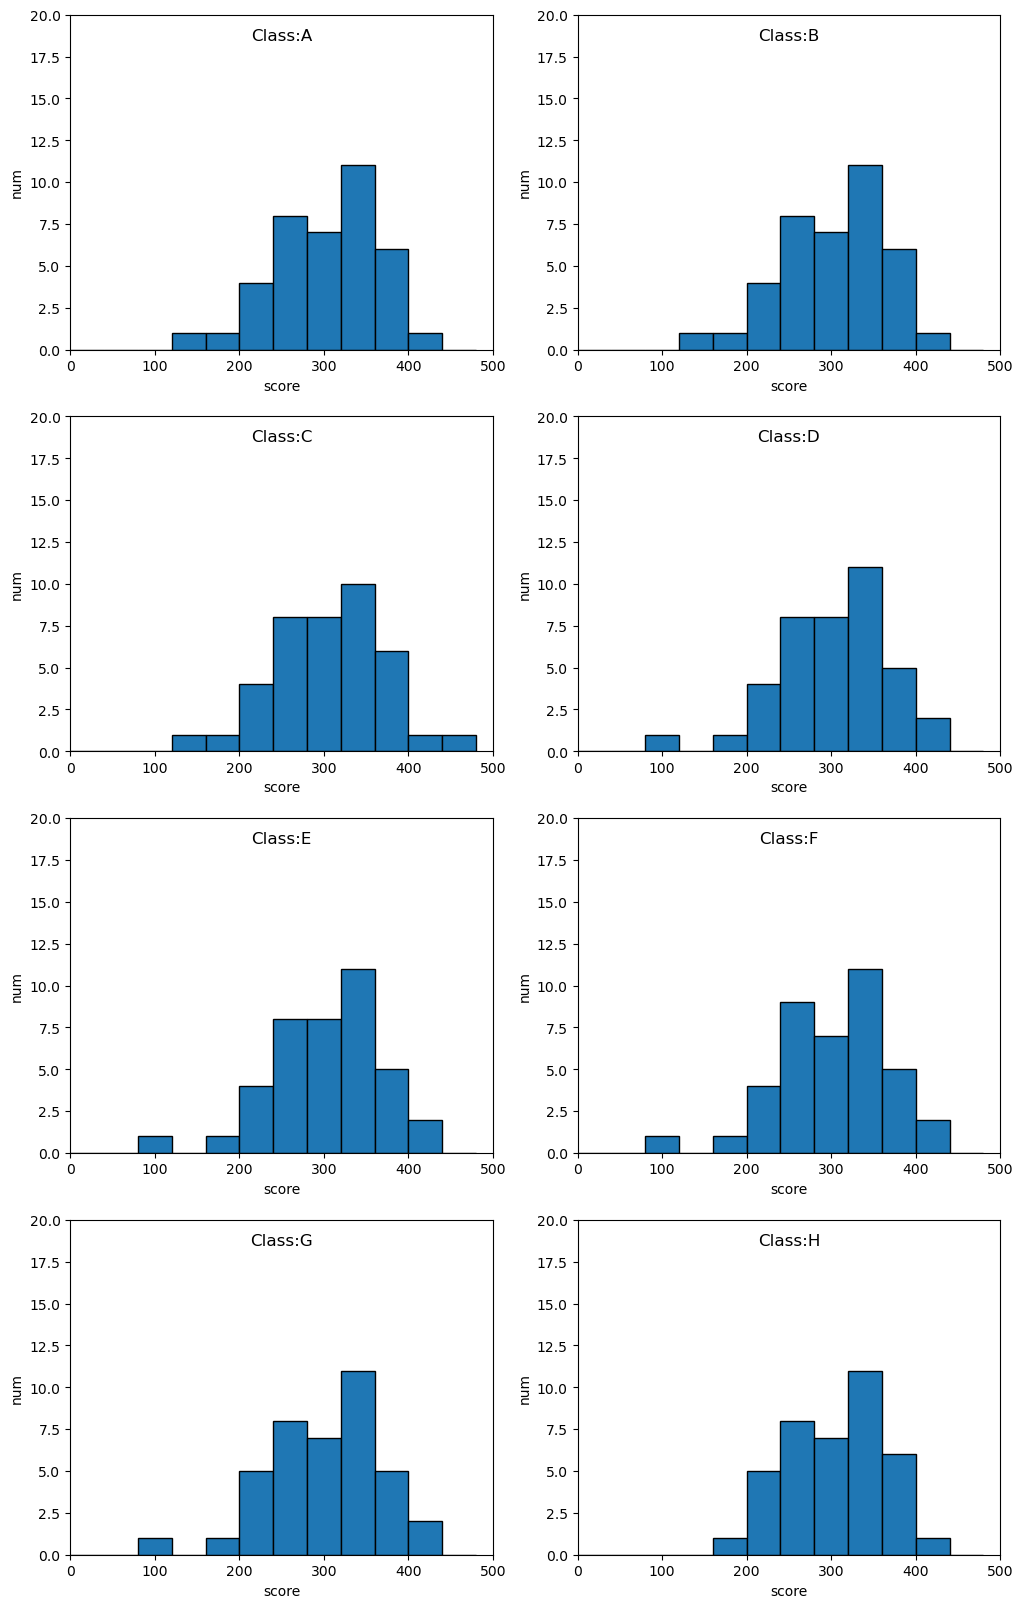

In [88]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = s_df[s_df['init_assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         
                        )
    ax.hist(cls_df['score'], bins=range(0,500,40), edgecolor='black')
    ax.set_title('Class:{:s}'.format(c), loc='center', y=0.9)

### コード全体

In [94]:
import pandas as pd
import pulp

s_df = pd.read_csv('students.csv')
s_pair_df = pd.read_csv('student_pairs.csv')

prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

# 生徒のリスト
S = s_df['student_id'].tolist()

# クラスのリスト
C = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

# (1)各生徒は１つのクラスに割り当てる
for s in S:
    prob += pulp.lpSum([x[s,c] for c in C]) == 1

# (2)各クラスの生徒の人数は39人以上、40人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S]) >= 39
    prob += pulp.lpSum([x[s,c] for s in S]) <= 40

# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

# (3) 各クラスの男子生徒、女子生徒の人数は20人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
    prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

# 学力を辞書表現に変換
score = {row.student_id:row.score for row in s_df.itertuples()}

# 平均点の算出
score_mean = s_df['score'].mean()

# (4) 各クラスの学力試験の平均点は学年平均点±10点とする。      
for c in C:
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) >= (score_mean - 10) * pulp.lpSum([x[s,c] for s in S])
    prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10) * pulp.lpSum([x[s,c] for s in S])

# リーダー気質の生徒の集合
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

# (5)各クラスにリーダー気質の生徒を2人以上割り当てる。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

# 特別な支援が必要な生徒の集合
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

# (6) 特別な支援が必要な生徒は各クラスに1人以下とする。
for c in C:
    prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

# 生徒の特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

# (7) 特定ペアの生徒は同一クラスに割り当てない。
for s1, s2 in SS:
    for c in C:
        prob += x[s1,c] + x[s2,c] <= 1

# 初期クラス編成を作成
s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first')
class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)
init_flag = {(s,c): 0 for s in S for c in C}
for row in s_df.itertuples():
    init_flag[row.student_id, row.init_assigned_class] = 1
# 新しいリスト initSC を作成
# リスト init_flag を使用して、init_flag[s,c] が 1 である (s,c) のペアを initSC に追加
initSC = [(s, c) for s in S for c in C if init_flag[s, c] == 1]
print(initSC)
    
# 目的関数:初期クラス編成と最適化結果のクラス編成をできるだけ一致させる
prob += pulp.lpSum([x[s,c] for s,c in initSC])  

# 求解        
status = prob.solve()
print('Status:', pulp.LpStatus[status])

# 最適化結果の表示
# 各クラスに割り当てられている生徒のリストを辞書に格納
C2Ss = {}
for c in C:
    C2Ss[c] = [s for s in S if x[s,c].value()==1]
    
for c, Ss in C2Ss.items():
    print('Class:', c)
    print('Num:', len(Ss))
    print('Student:', Ss)
    print()

[(1, 'F'), (2, 'G'), (3, 'H'), (4, 'E'), (5, 'D'), (6, 'F'), (7, 'G'), (8, 'E'), (9, 'G'), (10, 'G'), (11, 'D'), (12, 'E'), (13, 'E'), (14, 'B'), (15, 'G'), (16, 'F'), (17, 'B'), (18, 'G'), (19, 'E'), (20, 'H'), (21, 'C'), (22, 'E'), (23, 'A'), (24, 'D'), (25, 'H'), (26, 'G'), (27, 'C'), (28, 'F'), (29, 'F'), (30, 'B'), (31, 'G'), (32, 'B'), (33, 'E'), (34, 'H'), (35, 'B'), (36, 'G'), (37, 'G'), (38, 'C'), (39, 'D'), (40, 'F'), (41, 'B'), (42, 'F'), (43, 'E'), (44, 'C'), (45, 'F'), (46, 'C'), (47, 'D'), (48, 'E'), (49, 'B'), (50, 'D'), (51, 'C'), (52, 'G'), (53, 'H'), (54, 'C'), (55, 'E'), (56, 'A'), (57, 'E'), (58, 'F'), (59, 'E'), (60, 'H'), (61, 'D'), (62, 'C'), (63, 'C'), (64, 'B'), (65, 'H'), (66, 'B'), (67, 'D'), (68, 'A'), (69, 'H'), (70, 'F'), (71, 'G'), (72, 'H'), (73, 'C'), (74, 'D'), (75, 'C'), (76, 'C'), (77, 'F'), (78, 'G'), (79, 'B'), (80, 'G'), (81, 'H'), (82, 'A'), (83, 'B'), (84, 'C'), (85, 'C'), (86, 'B'), (87, 'H'), (88, 'B'), (89, 'A'), (90, 'D'), (91, 'F'), (92, 'D

In [91]:
# 検証用のデータフレームの用意
result_df2 = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {}
for s in S:
    S2C[s] = [c for c in C if x[s,c].value()==1][0]

# 生徒データに各生徒が度のクラスに割り当てられたかの情報を結合            
result_df2['assigned_class'] = result_df2['student_id'].map(S2C)
result_df2.head(5)

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D


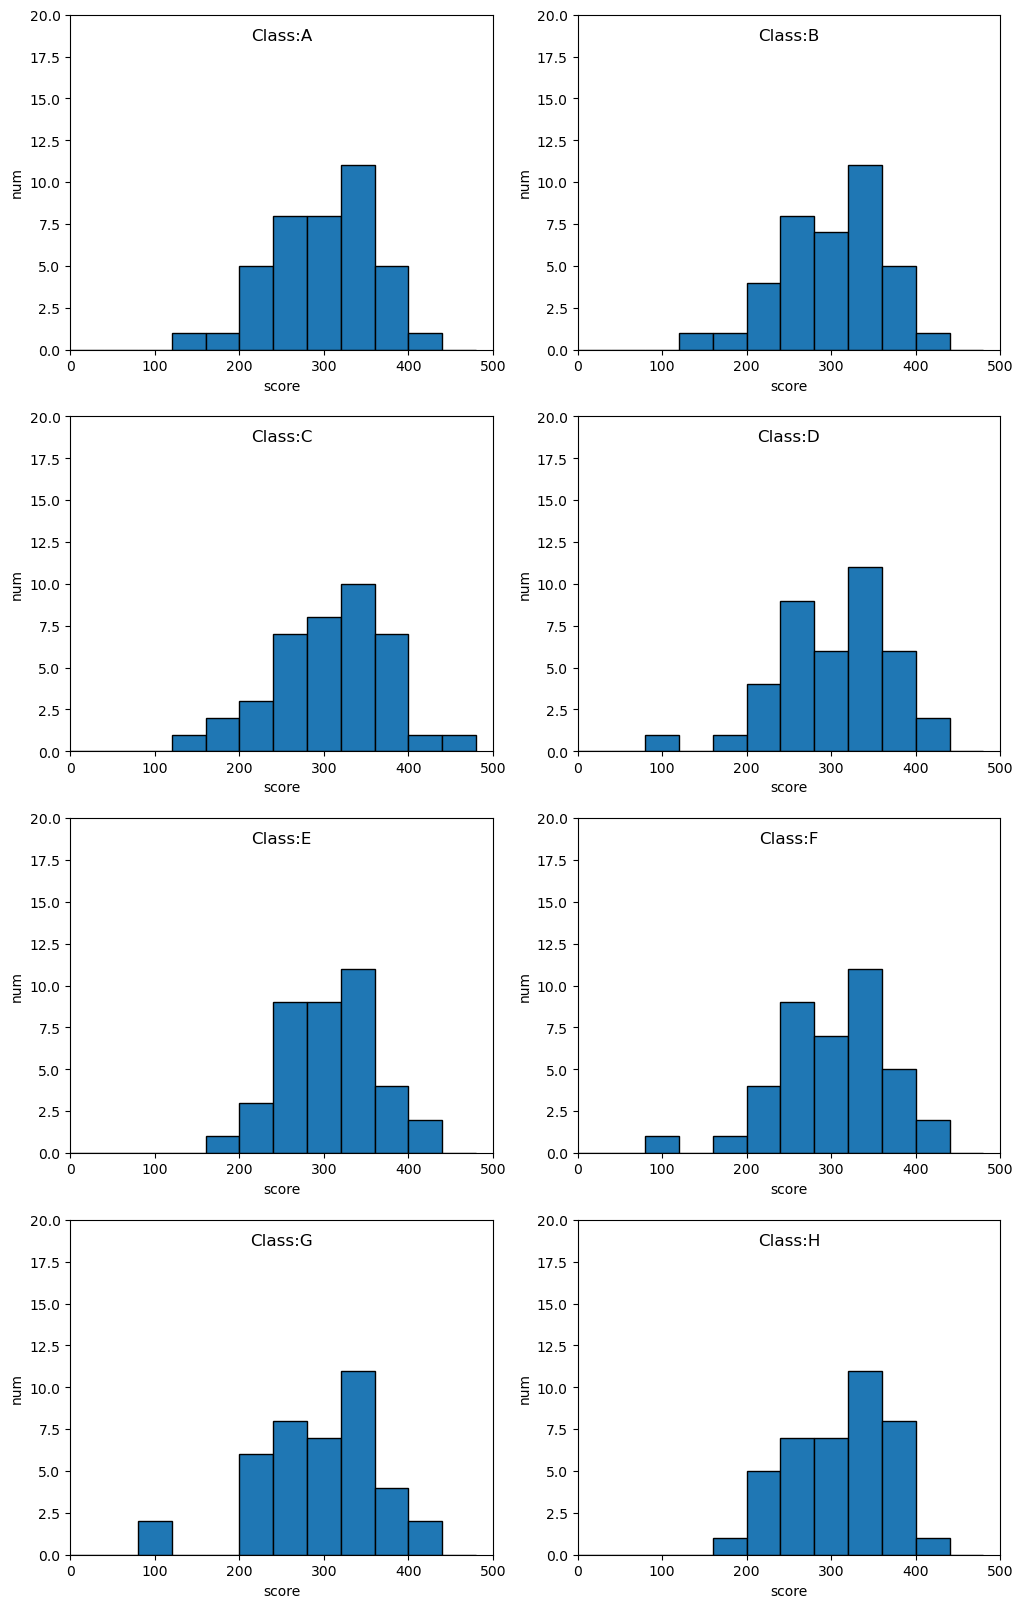

In [92]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
    cls_df = result_df2[result_df2['assigned_class']==c]
    ax = fig.add_subplot(4
                         , 2
                         , i+1
                         , xlabel='score'
                         , ylabel='num'
                         , xlim=(0, 500)
                         , ylim=(0, 20)
                         
                        )    
    ax.hist(cls_df['score'], bins=range(0,500,40), edgecolor='black')
    ax.set_title('Class:{:s}'.format(c), loc='center', y=0.9)